# Training a Tiny YOLOv4 Face Mask Detector

The model is pretrained on the COCO dataset. The framework used for training is Darknet.
Will run through the following steps:

*   Install the libraries (Darknet , etc.)
*   Train the model on the new images

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
#take a look at the kind of GPU we have
!nvidia-smi

Mon Aug 24 06:43:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installing Darknet for YOLOv4 on Colab




In [ ]:
%cd /content/
%rm -rf darknet

/content


In [ ]:
# clone darknet repo
!git clone https://github.com/PuneethBC/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14263, done.
remote: Total 14263 (delta 0), reused 0 (delta 0), pack-reused 14263
Receiving objects: 100% (14263/14263), 12.63 MiB | 6.68 MiB/s, done.
Resolving deltas: 100% (9774/9774), done.


In [ ]:
#install environment from the Makefile
%cd darknet/

!make -f Makefile_p1_colab

[Errno 2] No such file or directory: 'darknet/'
/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## Start the model training

In [ ]:
%cd ../darknet/
!mkdir -p train/mask_det/weights
!./darknet detector train /content/darknet/train/mask_det/mask_det.data /content/darknet/train/mask_det/yolov4-tiny.cfg /content/darknet/train/yolov4-tiny.conv.29 -dont_show -ext_output -map

Se han truncado las últimas 5000 líneas del flujo de salida.
 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 58.80 %, best = 58.96 % 
 3396: 0.241519, 0.221987 avg loss, 0.000261 rate, 1.219427 seconds, 217344 images, 0.253506 hours left
Loaded: 0.000041 seconds
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 30 Avg (IOU: 0.843273, GIOU: 0.840619), Class: 0.998250, Obj: 0.889783, No Obj: 0.001953, .5R: 0.972222, .75R: 0.916667, count: 36, class_loss = 0.055447, iou_loss = 0.321179, total_loss = 0.376626 
v3 (iou loss, Normalizer: (iou: 0.07, cls: 1.00) Region 37 Avg (IOU: 0.840290, GIOU: 0.835633), Class: 0.995069, Obj: 0.910049, No Obj: 0.002538, .5R: 0.994872, .75R: 0.917949, count: 195, class_loss = 0.238837, iou_loss = 16.890762, total_loss = 17.129599 
 total_bbox = 804812, rewritten_bbox = 0.037897 % 

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 58.80 %, best = 58.96 % 
 3397: 0.147315, 0.214520 avg loss, 0.000261 rate, 1.2594

In [ ]:
from google.colab import files

weights_file = 'train/mask_det/weights/yolov4-tiny_best.weights'
files.download(weights_file)

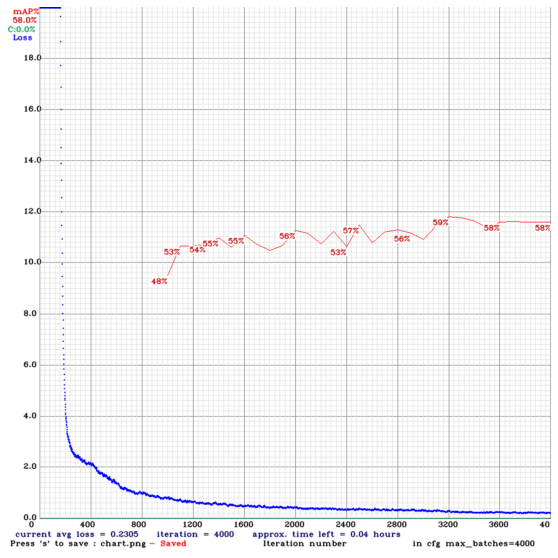

In [ ]:
imShow("chart_yolov4-tiny.png")

## Check the model performance
The metrics run on the test images so they may not be fully representative, only indicative

In [ ]:
!./darknet detector map /content/yolotinyv3_medmask_demo/obj.data /content/darknet/train/mask_det/yolov4-tiny.cfg "/content/darknet/train/mask_det/weights/yolov4-tiny_best.weights" -points 0

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9